In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
# plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import pandas as pd 
import yfinance as yf

In [6]:
START = '2019-01-01'
END = '2019-4-11'
HORIZON = 70
BACKTEST = 30
ASSETS = ['AAPL', 'TSLA', 'PFE', 'SHEL', 'EQIX',
              'NFLX', 'WMT', 'GS', 'CBT', 'UPS', 'PFE']

In [7]:
from pandas_datareader import data as pdr 

In [8]:
prices_df = yf.download(ASSETS, start=START, 
                        end=END)
prices_df

[*********************100%***********************]  10 of 10 completed


Adj Close                                                 \
                 AAPL        CBT        EQIX          GS        NFLX   
Date                                                                   
2019-01-02  38.047043  38.645786  326.783691  156.473312  267.660004   
2019-01-03  34.257286  37.605389  322.993042  154.181168  271.200012   
2019-01-04  35.719696  39.312695  330.322388  159.220200  297.570007   
2019-01-07  35.640186  39.623940  330.985260  160.102509  315.339996   
2019-01-08  36.319607  39.801773  337.857056  159.511276  320.269989   
...               ...        ...         ...         ...         ...   
2019-04-04  47.349033  40.025803  433.316559  184.685135  367.880005   
2019-04-05  47.665993  40.572006  438.180878  184.822113  365.489990   
2019-04-08  48.416065  40.616772  435.166534  184.968231  361.410004   
2019-04-09  48.270893  39.873558  432.067657  183.214783  364.709991   
2019-04-10  48.541885  40.025803  433.100586  185.370041  363.920013   

                                                                    ...  \
                  PFE       SHEL       TSLA         UPS        WMT  ...   
Date                                                                ...   
2019-01-02  35.108089  49.255322  20.674667   85.374245  87.205605  ...   
2019-01-03  34.125874  49.147411  20.024000   82.950287  86.757141  ...   
2019-01-04  34.905148  50.259689  21.179333   85.839699  87.299034  ...   
2019-01-07  35.091846  50.326088  22.330667   85.549896  88.326744  ...   
2019-01-08  35.254200  50.018959  22.356667   85.558678  88.943344  ...   
...               ...        ...        ...         ...        ...  ...   
2019-04-04  34.997101  53.902081  17.851999  100.971977  92.155334  ...   
2019-04-05  35.201809  54.365517  18.330667  101.290894  92.831619  ...   
2019-04-08  35.324635  55.022758  18.213333  100.971977  93.207336  ...   
2019-04-09  35.078987  54.407646  18.153999  100.032860  92.700104  ...   
2019-04-10  34.988914  54.778404  18.403999  100.183456  93.554893  ...   

               Volume                                                        \
                 AAPL     CBT    EQIX       GS      NFLX       PFE     SHEL   
Date                                                                          
2019-01-02  148158800  357400  664600  3999400  11679500  26430315  3918326   
2019-01-03  365248800  369300  779700  4060200  14969600  28503533  3523203   
2019-01-04  234428400  342800  543700  3788300  19330100  27145348  4106479   
2019-01-07  219111200  544200  730300  3152100  18620100  20995469  3678599   
2019-01-08  164101200  353200  680800  2692700  15359200  19677231  3134058   
...               ...     ...     ...      ...       ...       ...      ...   
2019-04-04   76457200  397600  448900  2582300   4627300  12990972  1574711   
2019-04-05   74106400  280500  284800  2447100   3905500  15559043  3073580   
2019-04-08  103526800  313500  251000  1891500   4653800  15410323  3245594   
2019-04-09  143072800  281600  284600  2400900   5439200  18825072  2283091   
2019-04-10   86781200  217000  304200  1907100   4545600  13202615  2505353   

                                         
                 TSLA      UPS      WMT  
Date                                     
2019-01-02  174879000  3297300  8152700  
2019-01-03  104478000  2705000  8277300  
2019-01-04  110911500  3347300  8029100  
2019-01-07  113268000  3795700  7789700  
2019-01-08  105127500  3034300  7200900  
...               ...      ...      ...  
2019-04-04  355810500  2889400  4026300  
2019-04-05  195574500  2487300  4656000  
2019-04-08  156156000  1854500  5422400  
2019-04-09   88560000  2230000  4367500  
2019-04-10  105919500  1767700  4091100  

[69 rows x 60 columns]

In [7]:
# prices_df.to_excel('5_year_data.xlsx')

<AxesSubplot:title={'center':'Stock prices of the considered assets'}, xlabel='Date'>

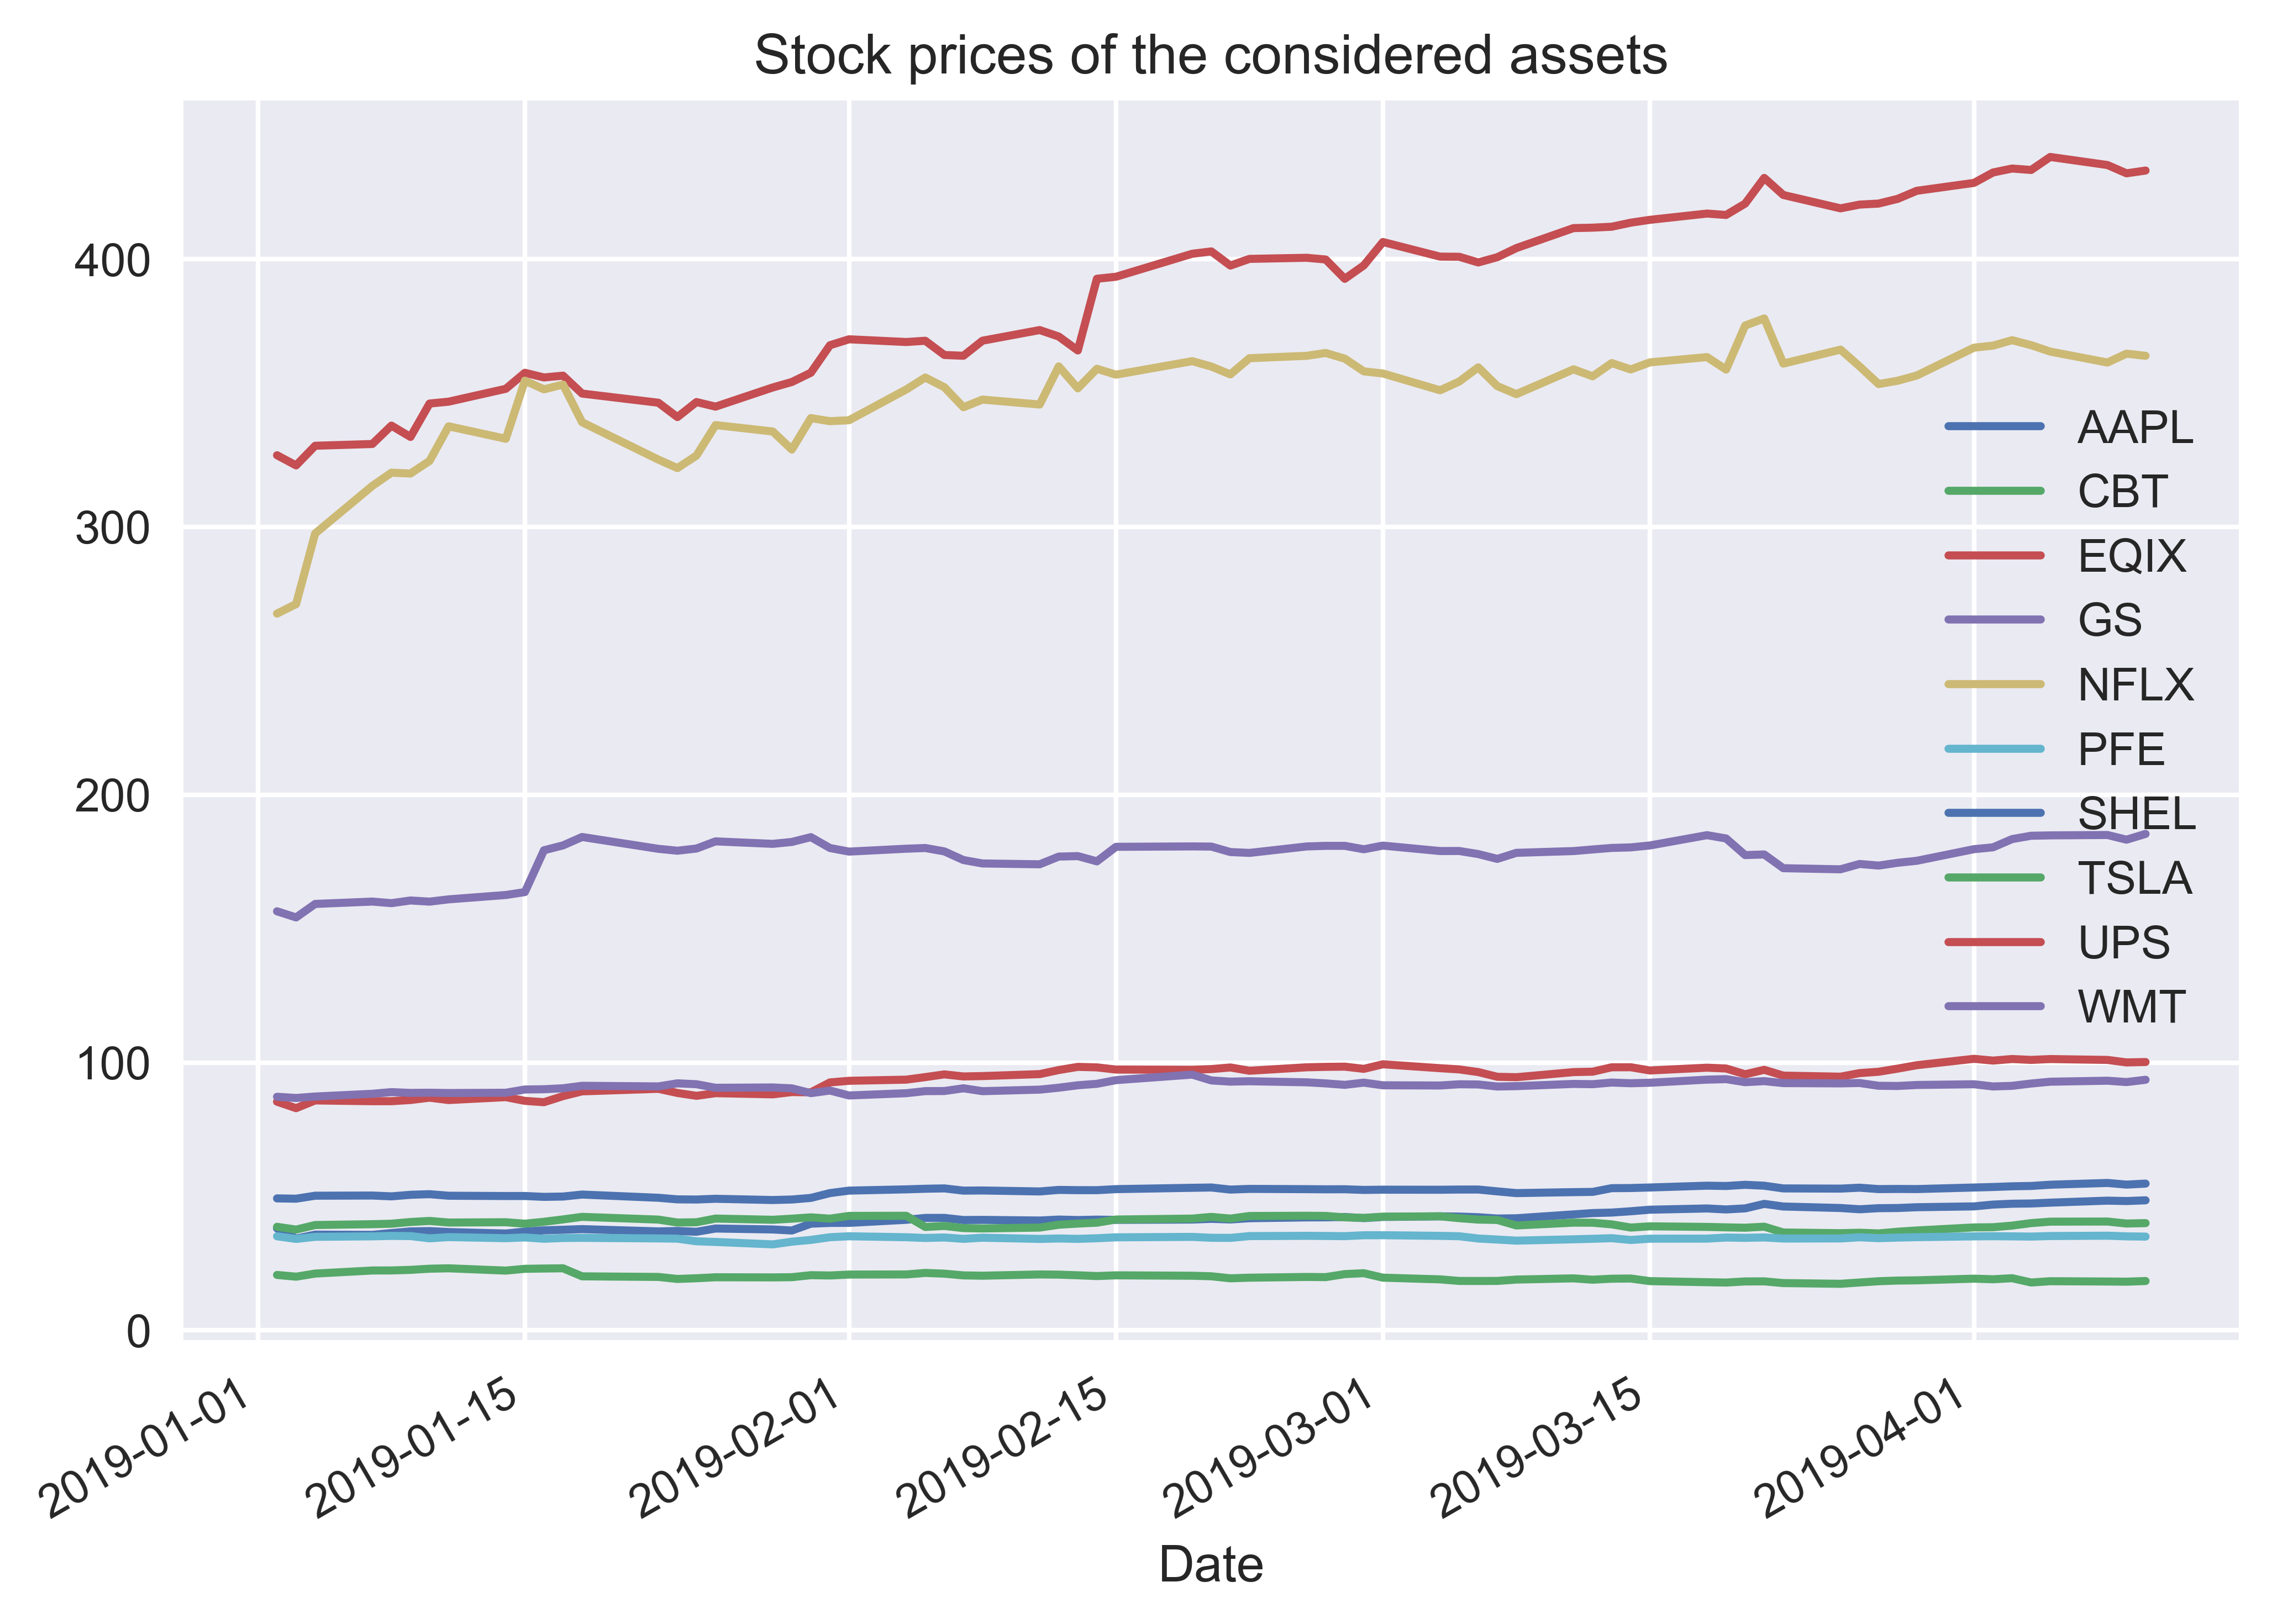

In [9]:
prices_df['Adj Close'].plot(title='Stock prices of the considered assets')

In [10]:
returns = prices_df['Adj Close'].pct_change().dropna()
returns

,AAPL,CBT,EQIX,GS,NFLX,PFE,SHEL,TSLA,UPS,WMT
Date,,,,,,,,,,
2019-01-03,-0.099607,-0.026921,-0.011600,-0.014649,0.013226,-0.027977,-0.002191,-0.031472,-0.028392,-0.005143
2019-01-04,0.042689,0.045401,0.022692,0.032683,0.097234,0.022835,0.022631,0.057697,0.034833,0.006246
2019-01-07,-0.002226,0.007917,0.002007,0.005541,0.059717,0.005349,0.001321,0.054361,-0.003376,0.011772
2019-01-08,0.019063,0.004488,0.020762,-0.003693,0.015634,0.004627,-0.006103,0.001164,0.000103,0.006981
2019-01-09,0.016982,0.016086,-0.012546,0.006272,-0.000968,-0.002072,0.011616,0.009483,0.005132,-0.003256
...,...,...,...,...,...,...,...,...,...,...
2019-04-04,0.001741,0.023821,-0.001234,0.006821,-0.005057,-0.002334,0.002351,-0.082348,-0.003323,0.009466
2019-04-05,0.006694,0.013646,0.011226,0.000742,-0.006497,0.005849,0.008598,0.026813,0.003158,0.007339
2019-04-08,0.015736,0.001103,-0.006879,0.000791,-0.011163,0.003489,0.012089,-0.006401,-0.003149,0.004047


In [11]:
portfolio_weights = 10 * [1 / 10]
portfolio_returns = pd.Series(np.dot(portfolio_weights, returns.T), 
                              index=returns.index)
portfolio_returns

Date
2019-01-03   -0.023473
2019-01-04    0.038494
2019-01-07    0.014238
2019-01-08    0.006303
2019-01-09    0.004673
                ...   
2019-04-04   -0.005010
2019-04-05    0.007757
2019-04-08    0.000966
2019-04-09   -0.006490
2019-04-10    0.005016
Length: 68, dtype: float64

In [17]:
avg_weights = [0.71*0.01, 1.82*0.01, 34.55*0.01,18.92*0.01,5.74*0.01,6.85*0.01,2.44*0.01,1.16*0.01,2.46*0.01,25.35*0.01]
avg_returns = pd.Series(np.dot(avg_weights, returns.T), 
                              index=returns.index)
avg_returns

Date
2019-01-03   -0.011554
2019-01-04    0.025960
2019-01-07    0.009228
2019-01-08    0.009543
2019-01-09   -0.003238
                ...   
2019-04-04    0.002280
2019-04-05    0.006801
2019-04-08   -0.001328
2019-04-09   -0.006479
2019-04-10    0.005561
Length: 68, dtype: float64

In [27]:
import pyfolio as pf
plt.figure(dpi=300, figsize=(9,6))
pf.create_simple_tear_sheet(portfolio_returns)
# pf.plot_rolling_returns(portfolio_returns, avg_returns)

Start date,2019-01-03
End date,2019-04-10
Total months,3
,Backtest
Annual return,64.2%
Cumulative returns,14.3%
Annual volatility,15.7%
Sharpe ratio,3.24
Calmar ratio,18.07
Stability,0.72
Max drawdown,-3.6%


<Figure size 2700x1800 with 0 Axes>

In [21]:
?pf.plot_rolling_returns